In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
import doc_retention_utils as dr
from lmfit import Model
from scipy.stats import chi2

# plt.style.use("ggplot")

# Load Evans data

**Note:** We added the Langtjern (Norway) DOC budget to this dataset.

In [2]:
data_fpath = r"data/evans_2017_doc_retention_cleaned.csv"
df = pd.read_csv(data_fpath)

df.sort_values("tau", inplace=True)

# Drop any NANs in tau or RDOC
df = df.dropna(how="any", subset=["tau", "RDOC"])

# Calculate transmission
df["TDOC"] = 1 - df["RDOC"]

# Drop negative retention values
# Evans et al. used RDOC threshold of 0.1
df_neg = df.query("RDOC <= -0.1")
df = df.query("RDOC > 0")

df.head()

,name,country,type,nutrient_status,tau,DOC_in,DOC_out,TDOC,RDOC,Notes,DOC_type
22,Ekojarvi,Finland,Lake,Oligotrophic,0.07,2.79,2.52,0.90,0.10,NaN,DOC sink
27,Røynelandsvatn,Norway,Lake,Oligotrophic,0.10,6.37,5.49,0.86,0.14,NaN,DOC sink
51,Lundetjenn,Norway,Lake,Oligotrophic,0.10,8.32,8.28,0.99,0.01,NaN,Balanced
35,Black Esk,UK,Reservoir,Oligotrophic,0.12,9.25,7.30,0.79,0.21,NaN,DOC sink
33,Gäddtjärn,Sweden,Lake,Oligotrophic,0.13,15.00,11.72,0.78,0.22,NaN,DOC sink


In [3]:
df_neg

,name,country,type,nutrient_status,tau,DOC_in,DOC_out,TDOC,RDOC,Notes,DOC_type
73,Woods Pond,Canada,Lake,Mesotrophic,0.08,73.89,83.96,1.14,-0.14,NaN,Source
68,Bull Trout,USA,Lake,Oligotrophic,0.13,1.16,1.43,1.23,-0.23,NaN,Source
78,Horseshoe-Bartlett,USA,Reservoir,Eutrophic,0.19,0.22,0.31,1.40,-0.40,NaN,Source
74,Baddinsgill,UK,Reservoir,Mesotrophic,0.19,8.14,9.39,1.15,-0.15,NaN,Source
76,Loch Leven,UK,Lake,Mesotrophic,0.30,4.84,5.59,1.16,-0.16,NaN,Source
69,Stanley,USA,Reservoir,Oligotrophic,0.30,1.14,1.53,1.34,-0.34,NaN,Source
79,Crooked Lake,Canada,Lake,Eutrophic,0.50,0.29,0.50,1.74,-0.74,NaN,Source
80,Marne,France,Reservoir,Eutrophic,0.53,0.26,0.49,1.86,-0.86,NaN,Source
75,West Water,UK,Reservoir,Mesotrophic,0.67,6.99,9.00,1.29,-0.29,NaN,Source
82,Acton,USA,Reservoir,Eutrophic,0.80,1.62,2.26,1.40,-0.40,NaN,Source


# Also load in newly gathered river data

In [4]:
riv_df = pd.read_csv(r'data/review_instream_doc_retention_summary.csv')
# Drop data associated with natural DOM addition experiments
riv_df = riv_df.loc[riv_df['Exclude_expts'] == 0]

riv_df.rename({'Transmission (M_out/M_in)': 'mo_mi'}, axis=1, inplace=True)
riv_df.head()

,Site,mo_mi,t (days),Stream order,Ref,Exclude_expts
0,"NE Spain, site and sample median",1.000000,0.250000,Reaches in 2nd-4th order streams,Casas-Ruiz et al. (2017),0
1,"Wood Brook, England",0.982609,0.090981,1st order,Khamis et al. (2021),0
3,"Creeping Swamp, North Carolina, USA",0.360000,9.259259,3rd,Mulholland (1981),0
4,"Fort River, Massachusetts, USA",0.960000,0.132331,4th,Fisher (1977),0
5,"SE China, TLC, average",0.713333,0.885580,1st-2nd order,Gong et al. (2021),0


# Fit Vollenweider and exponential models

We considered grouping the lakes e.g. by geoclimatic region, but for now we will consider all lakes as one, as done by previous authors.

In [5]:
print(len(df), "lakes in the TOC dataset.")

print("\n\nFit for 'Vollenweider, constant sigma'")
toc_fit1 = dr.fit_model(dr.transmission_sigma_constant, df, "tau", "TDOC")

print("\n\nFit for 'Vollenweider, time-varying sigma'")
toc_fit2 = dr.fit_model(dr.transmission_sigma_as_func_of_tau, df, "tau", "TDOC")

print("\n\nFit for 'exponential decay'")
toc_fit_exp1 = dr.fit_model(dr.transmission_k_constant, df, "tau", "TDOC")

print("\n\nFit for 'exponential decay'")
toc_fit_exp2 = dr.fit_model(dr.transmission_k_as_func_of_tau, df, "tau", "TDOC")

55 lakes in the TOC dataset.


Fit for 'Vollenweider, constant sigma'
[[Model]]
    Model(transmission_sigma_constant)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 15
    # data points      = 55
    # variables        = 1
    chi-square         = 2.39436370
    reduced chi-square = 0.04434007
    Akaike info crit   = -170.381862
    Bayesian info crit = -168.374529
    R-squared          = -0.01139269
[[Variables]]
    sigma:  0.33778999 +/- 0.05245209 (15.53%) (init = 0.5)
R2: 0.01


Fit for 'Vollenweider, time-varying sigma'
[[Model]]
    Model(transmission_sigma_as_func_of_tau)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 55
    # variables        = 2
    chi-square         = 1.32520579
    reduced chi-square = 0.02500388
    Akaike info crit   = -200.917099
    Bayesian info crit = -196.902432
    R-squared          = 0.44022562
[[Variables]]
    a:  0.53587359 +/- 0.05520546 (10.30%) (init 

## Plot

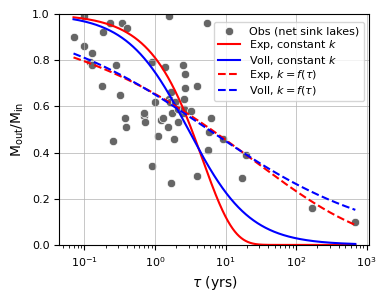

In [6]:
# Plot all models on one plot

fig, ax = plt.subplots(figsize=(4, 3))

# Plot observations
sn.scatterplot(data=df, x='tau', y='TDOC', color='0.4', label='Obs (net sink lakes)')

# Plot each model's fit
tau_values = np.linspace(df['tau'].min(), df['tau'].max(), 100000)
ax.plot(tau_values, toc_fit_exp1.eval(tau=tau_values), label='Exp, constant $k$', color='red')
ax.plot(tau_values, toc_fit1.eval(tau=tau_values), label=r'Voll, constant $k$', color='blue')
ax.plot(tau_values, toc_fit_exp2.eval(tau=tau_values), ls='--', label=r'Exp, $k = f(\tau$)', color='red')
ax.plot(tau_values, toc_fit2.eval(tau=tau_values), ls='--', label=r'Voll, $k = f(\tau$)', color='blue')

# Also plot implied results of Catalan's regression, when rearranged for Cout/Cin
# trans_catalan = np.exp(-0.38 * tau_values ** 0.55)
# ax.plot(tau_values, trans_catalan, ls='--', label="Exponential (Catalan et al. 2016)", color='orange')

# # Add newly gathered stream metabolism data
# new_color = 'greenyellow'
# ax.scatter(riv_df['t (days)'] / 365, riv_df['mo_mi'], marker='^', color=new_color, edgecolors='k', label='Additional river data (not used in fitting)')

plt.ylim(0, 1)
plt.xscale('log')

plt.grid(True, which='major', linewidth=0.5)

# Add labels and legend
plt.ylabel('$\mathrm{M_{out}/M_{in}}$', size=10)
plt.xlabel((r'$\tau$ (yrs)'), size=10)
plt.tick_params(axis='both', which='major', labelsize=8)
plt.tick_params(axis='both', which='minor', labelsize=8)
ax.legend(fontsize=8, bbox_to_anchor=(0.48, 0.99), labelspacing=0.15)

# Add the plot location label in bold text to the top right corner
# plt.text(0.98, 0.98, '(d)', transform=plt.gca().transAxes, fontsize=12, fontweight='bold', ha='right', va='top')

plt.savefig(r'graphs/model_results_evans-data_all-countries-all-taus_no-annotation.png', bbox_inches='tight')

# Show plot
plt.show()

In [7]:
print("\nLRT constant sigma vs time-varying sigma:")
dr.likelihood_ratio_test(toc_fit1, toc_fit2)


LRT constant sigma vs time-varying sigma:
Likelihood Ratio: 1.0691579118037517
Degrees of Freedom: 1
P-value: 0.301


In [8]:
print("\nLRT constant k vs time-varying k:")
dr.likelihood_ratio_test(toc_fit_exp1, toc_fit_exp2)


LRT constant k vs time-varying k:
Likelihood Ratio: 1.7587255931297605
Degrees of Freedom: 1
P-value: 0.185


In [9]:
# R2 and MAE  
pred1 = toc_fit1.eval(tau=df['tau'].values)
dr.rs_mae(df['TDOC'], pred1, 'Voll, fit 1')
dr.calculate_bic(df['TDOC'], pred1, 1)

pred2 = toc_fit2.eval(tau=df['tau'].values)
dr.rs_mae(df['TDOC'], pred2, 'Voll, fit 2')
dr.calculate_bic(df['TDOC'], pred2, 2)

pred3 = toc_fit_exp1.eval(tau=df['tau'].values)
dr.rs_mae(df['TDOC'], pred3, 'Exp, fit 1')
dr.calculate_bic(df['TDOC'], pred3, 1)

pred4 = toc_fit_exp2.eval(tau=df['tau'].values)
dr.rs_mae(df['TDOC'], pred4, 'Exp, fit 2')
dr.calculate_bic(df['TDOC'], pred4, 2)

Voll, fit 1:
R2: -0.01 MAE: 0.17
-168.3745286059459
Voll, fit 2:
R2: 0.44 MAE: 0.12
-196.90243213600587
Exp, fit 1:
R2: -0.3 MAE: 0.19
-154.51699666270028
Exp, fit 2:
R2: 0.44 MAE: 0.12
-197.04750057361696


# Look at residuals

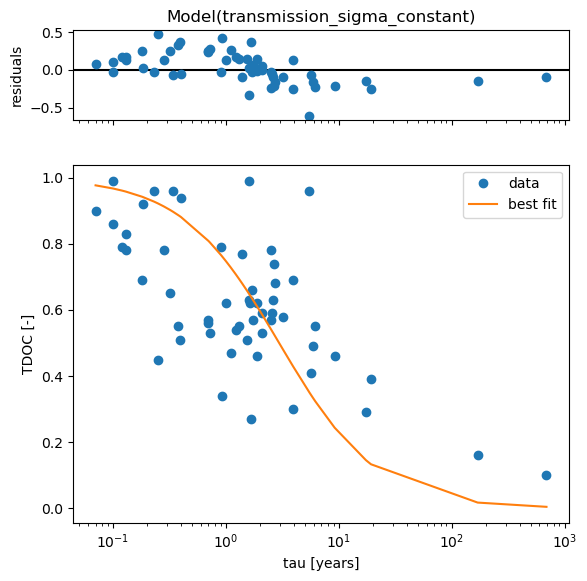

In [10]:
# Plot fit
toc_fit1.plot(xlabel="tau [years]", ylabel="TDOC [-]");
plt.xscale('log')

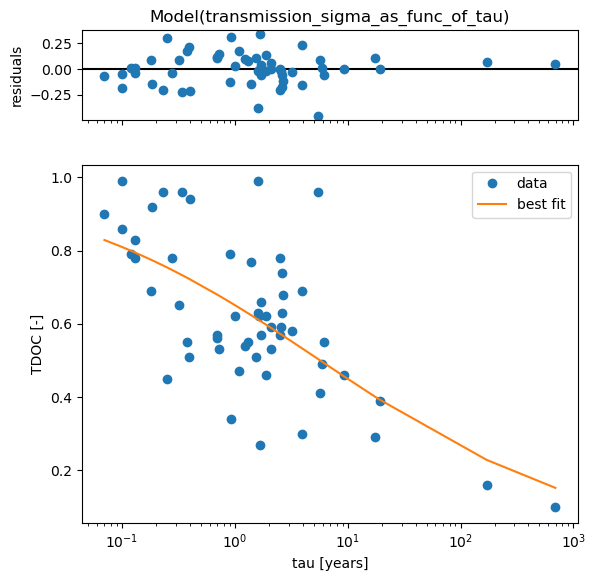

In [11]:
# Plot fit
toc_fit2.plot(xlabel="tau [years]", ylabel="TDOC [-]");
plt.xscale('log')

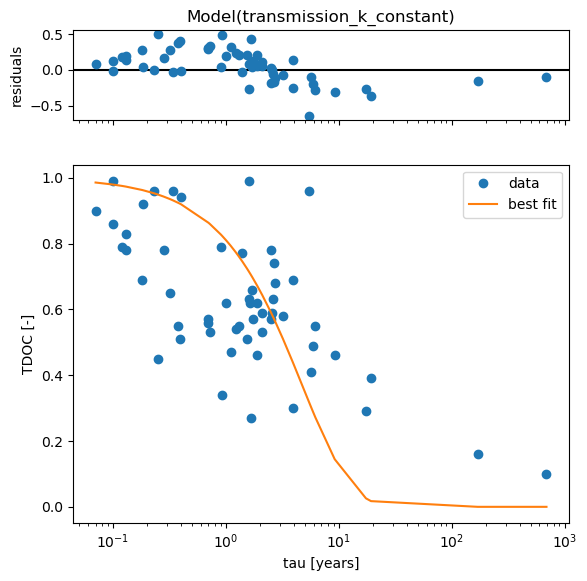

In [12]:
# Plot fit
toc_fit_exp1.plot(xlabel="tau [years]", ylabel="TDOC [-]");
plt.xscale('log')

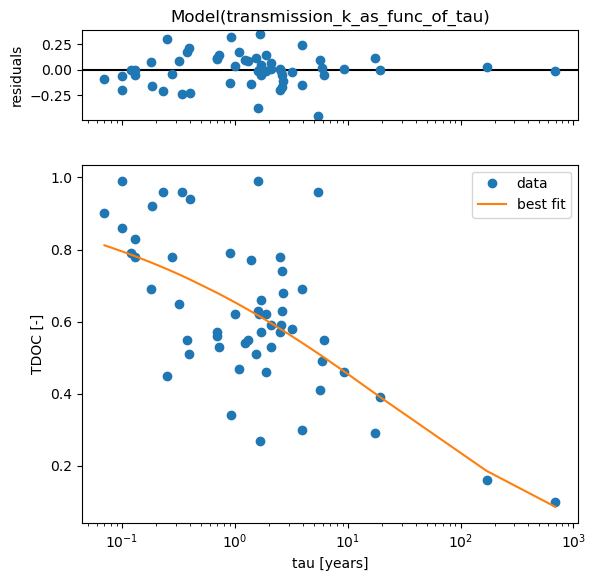

In [13]:
# Plot fit
toc_fit_exp2.plot(xlabel="tau [years]", ylabel="TDOC [-]");
plt.xscale('log')

# Fit TOC, limiting to tau < 10 years

In [14]:
tau_upper = 10
short_tau_df = df.loc[df['tau'] < tau_upper].copy()

print(len(short_tau_df), "lakes in the TOC dataset.")

print("\n\nFit for 'option 1'")
short_fit1 = dr.fit_model(dr.transmission_sigma_constant, short_tau_df, "tau", "TDOC")

print("\n\nFit for 'option 2'")
short_fit2 = dr.fit_model(dr.transmission_sigma_as_func_of_tau, short_tau_df, "tau", "TDOC")

print("\n\nFit for 'exponential decay'")
short_fit_exp1 = dr.fit_model(dr.transmission_k_constant, short_tau_df, "tau", "TDOC")

print("\n\nFit for 'exponential decay'")
short_fit_exp2 = dr.fit_model(dr.transmission_k_as_func_of_tau, short_tau_df, "tau", "TDOC")

51 lakes in the TOC dataset.


Fit for 'option 1'
[[Model]]
    Model(transmission_sigma_constant)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 13
    # data points      = 51
    # variables        = 1
    chi-square         = 2.27600975
    reduced chi-square = 0.04552020
    Akaike info crit   = -156.579493
    Bayesian info crit = -154.647668
    R-squared          = -0.35809638
[[Variables]]
    sigma:  0.35010951 +/- 0.05520235 (15.77%) (init = 0.5)
R2: -0.31


Fit for 'option 2'
[[Model]]
    Model(transmission_sigma_as_func_of_tau)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 51
    # variables        = 2
    chi-square         = 1.29580336
    reduced chi-square = 0.02644497
    Akaike info crit   = -183.307434
    Bayesian info crit = -179.443782
    R-squared          = 0.22679336
[[Variables]]
    a:  0.53284886 +/- 0.05591449 (10.49%) (init = 0.5)
    b: -0.69226196 +/- 0.09062132 (1

In [15]:
print("\nLRT constant sigma vs time-varying sigma:")
dr.likelihood_ratio_test(short_fit1, short_fit2)


LRT constant sigma vs time-varying sigma:
Likelihood Ratio: 0.9802063983154294
Degrees of Freedom: 1
P-value: 0.322


In [16]:
print("\nLRT constant k vs time-varying k:")
dr.likelihood_ratio_test(short_fit_exp1, short_fit_exp2)


LRT constant k vs time-varying k:
Likelihood Ratio: 1.5298187378225734
Degrees of Freedom: 1
P-value: 0.216


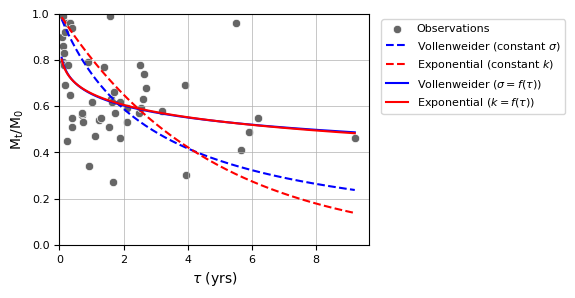

In [17]:
# Plot all models on one figure
fig, ax = plt.subplots(figsize=(4, 3))

# Plot observations
# ax.scatter(short_tau_df['tau'], short_tau_df['TDOC'], label='Observations', color='black')
sn.scatterplot(data=short_tau_df, x='tau', y='TDOC', label='Observations', color='0.4')  # label='Observations', 

# Plot each model's fit
tau_values = np.linspace(short_tau_df['tau'].min(), short_tau_df['tau'].max(), 100000)

ax.plot(tau_values, short_fit1.eval(tau=tau_values), ls='--', label=r'Vollenweider (constant $\sigma$)', color='blue')
ax.plot(tau_values, short_fit_exp1.eval(tau=tau_values), ls='--', label='Exponential (constant $k$)', color='red')
ax.plot(tau_values, short_fit2.eval(tau=tau_values), label=r'Vollenweider ($\sigma = f(\tau$))', color='blue')
ax.plot(tau_values, short_fit_exp2.eval(tau=tau_values), label=r'Exponential ($k = f(\tau$))', color='red')

# # Also plot implied results of Catalan's regression, when rearranged for Cout/Cin
# trans_catalan = np.exp(-0.38 * tau_values ** 0.55)
# ax.plot(tau_values, trans_catalan, label="Exponential decay (Catalan et al. 2016), k=f(t)", color='orange')

# plt.xscale('log')

plt.grid(True, which='major', linewidth=0.5)
ax.set_xlim(xmin=0)
ax.set_ylim(ymin=0, ymax=1)

# Add labels and legend
plt.ylabel('$\mathrm{M_{t}/M_{0}}$', size=10)
plt.xlabel((r'$\tau$ (yrs)'), size=10)
plt.tick_params(axis='both', which='major', labelsize=8)
plt.tick_params(axis='both', which='minor', labelsize=8)

ax.legend(fontsize=8, bbox_to_anchor=(1.65, 1))

# Add the plot location label in bold text to the top right corner
# plt.text(0.98, 0.98, 'd', transform=plt.gca().transAxes, fontsize=12, fontweight='bold', ha='right', va='top')

plt.savefig(f'graphs/model_results_evans-data_all-countries-short-taus_{tau_upper}_legend.png', bbox_inches='tight')
plt.show()

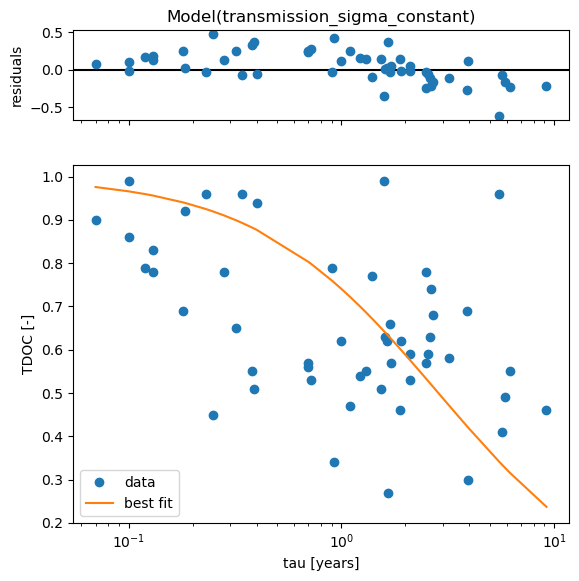

In [18]:
# Plot fit
short_fit1.plot(xlabel="tau [years]", ylabel="TDOC [-]");
plt.xscale('log')

In [19]:
# # Plot fit
# short_fit2.plot(xlabel="tau [years]", ylabel="TDOC [-]");
# plt.xscale('log')

In [20]:
# # Plot fit
# short_fit_exp.plot(xlabel="tau [years]", ylabel="TDOC [-]");
# plt.xscale('log')

# Fit net production lakes

In [21]:
print("\n\nFit for Voll, constant sigma")
prod_fit1 = dr.fit_model(dr.transmission_sigma_constant, df_neg, "tau", "TDOC")

print("\n\nFit for Voll, sigma = f(tau)")
prod_fit2 = dr.fit_model(dr.transmission_sigma_as_func_of_tau, df_neg, "tau", "TDOC")

print("\n\nFit for 'exponential decay', constant k")
prod_exp_fit1 = dr.fit_model(dr.transmission_k_constant, df_neg, "tau", "TDOC")

print("\n\nFit for 'exponential decay', time-varying k")
prod_exp_fit2 = dr.fit_model(dr.transmission_k_as_func_of_tau, df_neg, "tau", "TDOC")



Fit for Voll, constant sigma
[[Model]]
    Model(transmission_sigma_constant)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 15
    # variables        = 1
    chi-square         = 5.04692340
    reduced chi-square = 0.36049453
    Akaike info crit   = -14.3390706
    Bayesian info crit = -13.6310204
    R-squared          = -1.40314428
[[Variables]]
    sigma: -0.03968718 +/- 0.01184062 (29.83%) (init = 0.5)
R2: -0.02


Fit for Voll, sigma = f(tau)
[[Model]]
    Model(transmission_sigma_as_func_of_tau)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 48
    # data points      = 15
    # variables        = 2
    chi-square         = 1.32424260
    reduced chi-square = 0.10186482
    Akaike info crit   = -32.4081429
    Bayesian info crit = -30.9920425
    R-squared          = 0.36944832
[[Variables]]
    a: -0.36701844 +/- 0.03501130 (9.54%) (init = 0.5)
    b: -0.85366866 +/- 0.05401267 (6.33%) (ini

In [22]:
# Very divergent potential lines above tau = 2. More reliable below.
df_neg_trim = df_neg.loc[df_neg['tau'] < 2, :]

print("\n\nFit for Voll, constant sigma")
prod_fit1 = dr.fit_model(dr.transmission_sigma_constant, df_neg_trim, "tau", "TDOC")

print("\n\nFit for Voll, sigma = f(tau)")
prod_fit2 = dr.fit_model(dr.transmission_sigma_as_func_of_tau, df_neg_trim, "tau", "TDOC")

print("\n\nFit for 'exponential decay', constant k")
prod_exp_fit1 = dr.fit_model(dr.transmission_k_constant, df_neg_trim, "tau", "TDOC")

print("\n\nFit for 'exponential decay', time-varying k")
prod_exp_fit2 = dr.fit_model(dr.transmission_k_as_func_of_tau, df_neg_trim, "tau", "TDOC")



Fit for Voll, constant sigma
[[Model]]
    Model(transmission_sigma_constant)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 18
    # data points      = 13
    # variables        = 1
    chi-square         = 1.11492998
    reduced chi-square = 0.09291083
    Akaike info crit   = -29.9300508
    Bayesian info crit = -29.3651015
    R-squared          = -0.25882315
[[Variables]]
    sigma: -0.34471925 +/- 0.04274977 (12.40%) (init = 0.5)
R2: 0.11


Fit for Voll, sigma = f(tau)
[[Model]]
    Model(transmission_sigma_as_func_of_tau)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 26
    # data points      = 13
    # variables        = 2
    chi-square         = 0.52233725
    reduced chi-square = 0.04748520
    Akaike info crit   = -37.7870854
    Bayesian info crit = -36.6571867
    R-squared          = 0.41024976
[[Variables]]
    a: -0.38246714 +/- 0.03399619 (8.89%) (init = 0.5)
    b: -0.68864437 +/- 0.13349351 (19.38%) (ini

In [23]:
pred = prod_fit2.eval(tau=df_neg_trim['tau'].values)
dr.rs_mae(df_neg_trim['TDOC'], pred, 'Voll, fit 2')

Voll, fit 2:
R2: 0.41 MAE: 0.17


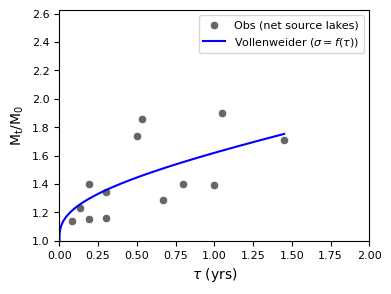

In [24]:
fig, ax = plt.subplots(figsize=(4, 3))

# Plot observations
sn.scatterplot(data=df_neg, x='tau', y='TDOC', color='0.4', label='Obs (net source lakes)')

# Plot each model's fit
tau_values = np.linspace(0, df_neg_trim['tau'].max(), 100000)

# ax.plot(tau_values, prod_fit1.eval(tau=tau_values), ls='--', label=r'Vollenweider (constant $\sigma$)', color='blue')
# ax.plot(tau_values, prod_exp_fit1.eval(tau=tau_values), ls='--', label='Exponential (constant $k$)', color='red')
ax.plot(tau_values, prod_fit2.eval(tau=tau_values), label=r'Vollenweider ($\sigma = f(\tau$))', color='blue')
# ax.plot(tau_values, prod_exp_fit2.eval(tau=tau_values), label=r'Exponential ($k = f(\tau$))', color='red')

# plt.xscale('log')
# plt.yscale('log')
ax.set_xlim(0, 2)

ax.set_ylim(ymin=1)

# plt.grid(True, which='major', linewidth=0.5)

# Add labels and legend
plt.ylabel('$\mathrm{M_{t}/M_{0}}$', size=10)
plt.xlabel((r'$\tau$ (yrs)'), size=10)
plt.tick_params(axis='both', which='major', labelsize=8)
plt.tick_params(axis='both', which='minor', labelsize=8)

ax.legend(fontsize=8)# , bbox_to_anchor=(0.65, 1))

# Add the plot location label in bold text to the top right corner
# plt.text(0.98, 0.98, 'd', transform=plt.gca().transAxes, fontsize=12, fontweight='bold', ha='right', va='top')

# plt.savefig(f'graphs/model_results_evans-data_all-countries-short-taus_{tau_upper}_legend.png', bbox_inches='tight')
plt.show()

The points with tau less than around 2 fall roughly on a line. But above there, it's not clear which of the two points is more likely to be correct. I dropped the long tau one originally, but perhaps it's the other one that is off and productivity tends to taper at around 2. Need more data from high productivity lakes to know. Decide to leave the question of productivity for now...